In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics
from sklearn import neural_network
from sklearn import ensemble
from sklearn import naive_bayes

# Overview

In [2]:
df = pd.read_csv('heart.csv')
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


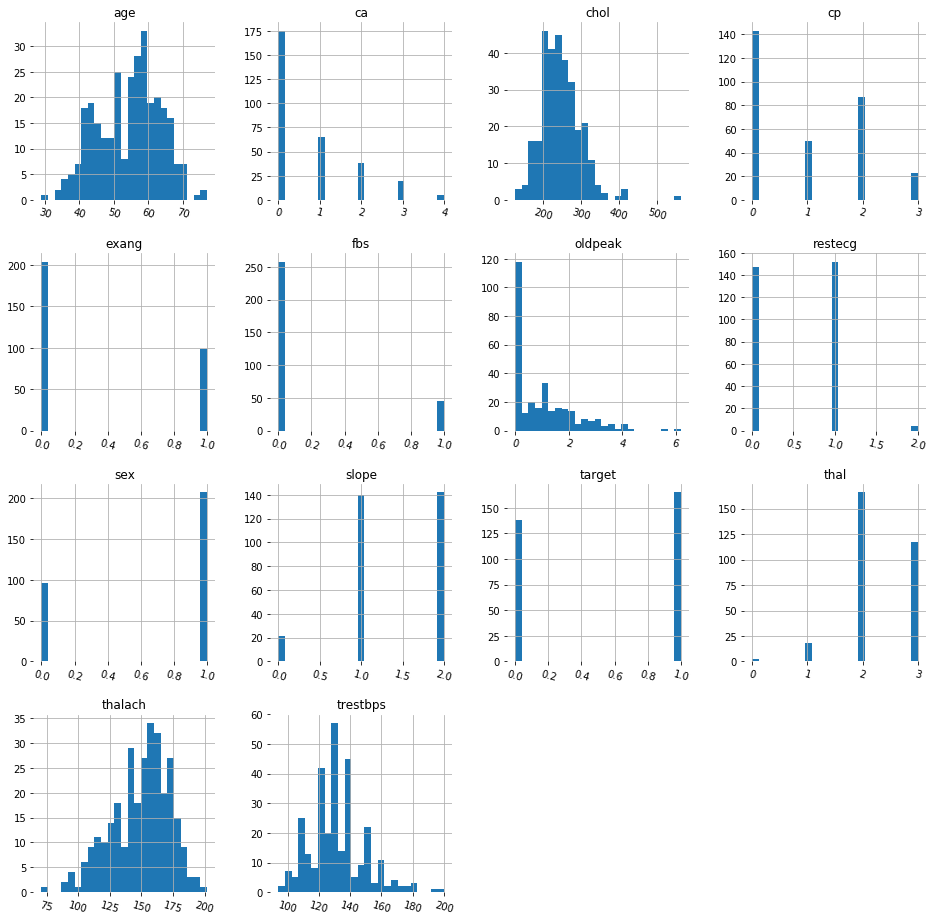

In [42]:
histogram = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
for x in histogram.ravel():
    x.title.set_size(12)
    x.yaxis.tick_left()

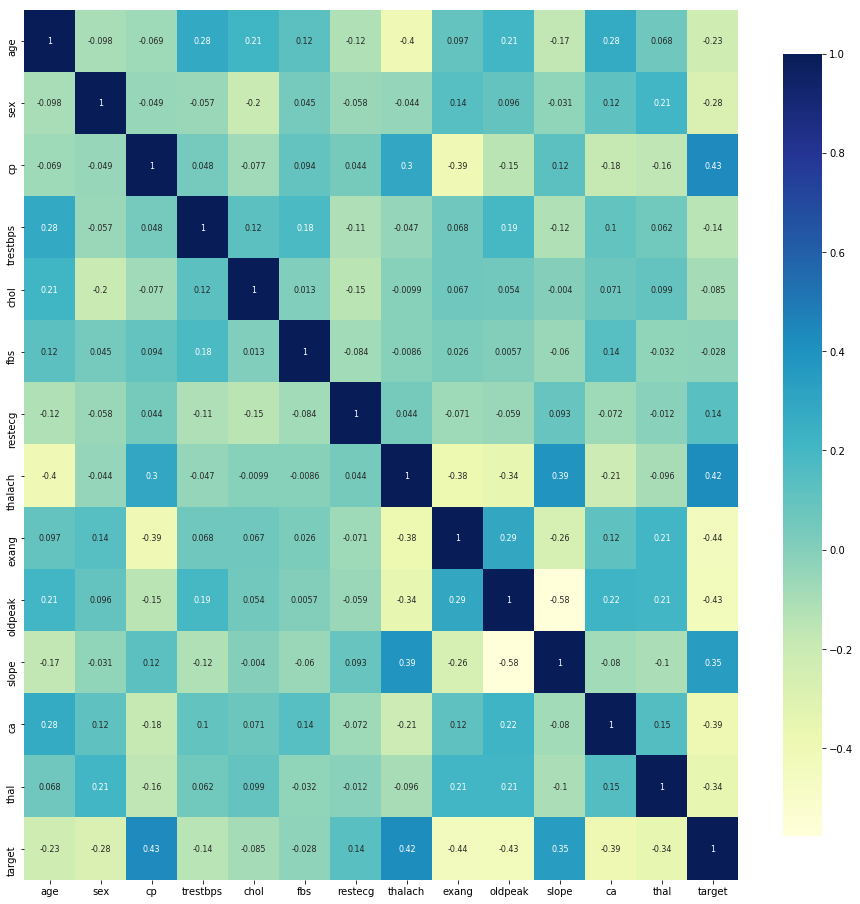

In [8]:
plt.figure(figsize=(16, 16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu", linecolor='w', annot_kws={"size":8}, cbar_kws={"shrink": .9})
plt.show()

# Classification

In [3]:
y = df['target']
x = df[cols]
train_X,test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

result_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision'])

def matrix_to_list(name, matrix):
    global result_table
    acc = matrix.trace() / matrix.sum()
    rec = matrix[0,0] / matrix[:,0].sum()
    pre = matrix[0,0] / matrix[0].sum()
    result_table = result_table.append({'Model':name, 'Accuracy':acc, 'Recall':rec, 'Precision':pre}, ignore_index=True)
    #return [name, acc, rec, pre]


SVM & Linear SVM Classifier

In [31]:
model_svc = svm.SVC().fit(train_X, train_y)
model_lsvc = svm.LinearSVC(max_iter=100).fit(train_X, train_y)
svc_y = model_svc.predict(test_X)
lsvc_y = model_lsvc.predict(test_X)
matrix_to_list('SVM', metrics.confusion_matrix(test_y, svc_y))
matrix_to_list('Linear SVM', metrics.confusion_matrix(test_y, lsvc_y))

Logistic Regression

In [32]:
model_lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=100).fit(train_X, train_y)
lr_y = model_lr.predict(test_X)
matrix_to_list('Logistic Regression', metrics.confusion_matrix(test_y, lr_y))

KNN

In [49]:
model_knc = neighbors.KNeighborsClassifier().fit(train_X, train_y)
knc_y = model_knc.predict(test_X)
matrix_to_list('KNN', metrics.confusion_matrix(test_y, knc_y))

Decision Tree & Random Forest

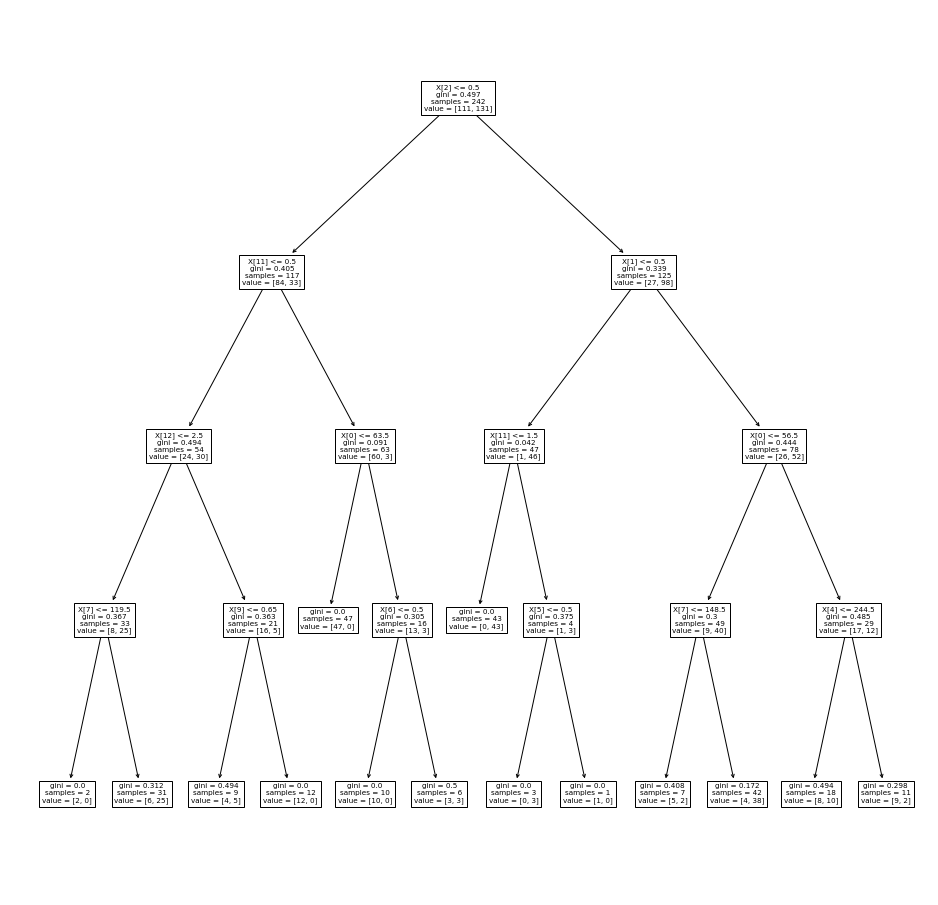

array([[21,  6],
       [ 6, 28]], dtype=int64)

In [10]:
model_dtc = tree.DecisionTreeClassifier(max_depth=4).fit(train_X, train_y)
'''model_rfc = ensemble.RandomForestClassifier(
    n_estimators=10,
    max_depth=10,
    max_leaf_nodes=100
).fit(train_X, train_y)'''
dtc_y = model_dtc.predict(test_X)
plt.figure(figsize=(16,16))
tree.plot_tree(model_dtc)
plt.show()
metrics.confusion_matrix(test_y, dtc_y)
#rfc_y = model_rfc.predict(test_X)
#matrix_to_list('Decision Tree', metrics.confusion_matrix(test_y, dtc_y))
#matrix_to_list('Random Forest', metrics.confusion_matrix(test_y, rfc_y))


Naive Bayes

In [11]:
model_bnb = naive_bayes.BernoulliNB().fit(train_X, train_y)
#model_catenb = naive_bayes.CategoricalNB().fit(train_X, train_y)
model_compnb = naive_bayes.ComplementNB().fit(train_X, train_y)
model_gnb = naive_bayes.GaussianNB().fit(train_X, train_y)
model_mnb = naive_bayes.MultinomialNB().fit(train_X, train_y)
bnb_y = model_bnb.predict(test_X)
compnb_y = model_compnb.predict(test_X)
gnb_y = model_gnb.predict(test_X)
mnb_y = model_mnb.predict(test_X)
matrix_to_list('Bernoulli NB', metrics.confusion_matrix(test_y, bnb_y))
matrix_to_list('Complement NB', metrics.confusion_matrix(test_y, compnb_y))
matrix_to_list('Gaussian NB', metrics.confusion_matrix(test_y, gnb_y))
matrix_to_list('Multinomial NB', metrics.confusion_matrix(test_y, mnb_y))

In [45]:
result_table

,Model,Accuracy,Recall,Precision
0,SVM,0.688525,0.722222,0.481481
1,Linear SVM,0.622951,1.000000,0.148148
2,Logistic Regression,0.852459,0.846154,0.814815
3,KNN,0.639344,0.586207,0.629630
4,Decision Tree,0.770492,0.709677,0.814815
5,Random Forest,0.836066,0.793103,0.851852
6,Bernoulli NB,0.819672,0.833333,0.740741
7,Complement NB,0.770492,0.760000,0.703704
8,Gaussian NB,0.852459,0.875000,0.777778
9,Multinomial NB,0.770492,0.760000,0.703704


END OF FILE

In [16]:
bool(model_gnb.predict(df[cols][1:2]))

True

In [ ]:
result_table = result_table.iloc[0:0]